In [1]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

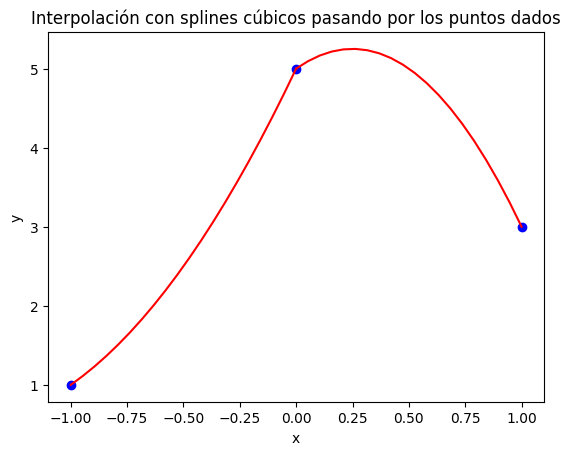

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

# Puntos dados
xs = [-1, 0, 1]
ys = [1, 5, 3]

# Coeficientes ajustados para que el spline 0 pase por el primer punto (x = -1, y = 1) y tenga pendiente m = 2
s = [
    {"a": ys[0], "b": 2, "c": 0, "d": 0},  # Ajuste inicial del spline entre x = -1 y x = 0
    {"a": ys[1], "b": 2, "c": 0, "d": 0},  # Ajuste inicial del spline entre x = 0 y x = 1
]

# Ajustar los coeficientes de modo que el spline 0 pase por el segundo punto (x = 0, y = 5)
s[0]["c"] = (ys[1] - s[0]["a"] - s[0]["b"] * (xs[1] - xs[0])) / (xs[1] - xs[0])**2
s[0]["d"] = 0 

# Ajustar los coeficientes de modo que el spline 1 pase por el último punto (x = 1, y = 3)
s[1]["c"] = (ys[2] - s[1]["a"] - s[1]["b"] * (xs[2] - xs[1])) / (xs[2] - xs[1])**2
s[1]["d"] = 0  

# Graficar los splines cúbicos
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos pasando por los puntos dados")
plt.show()